# Librerías e ingreso de dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv("train.csv")

# ¿Las casas renovadas recientemente tienen un precio mayor que las que no han sido renovadas?

Precio promedio de casas renovadas recientemente: $179,096.31
Precio promedio de casas no renovadas: $182,583.66
Las casas renovadas recientemente no tienen un precio mayor que las no renovadas.


<BarContainer object of 2 artists>

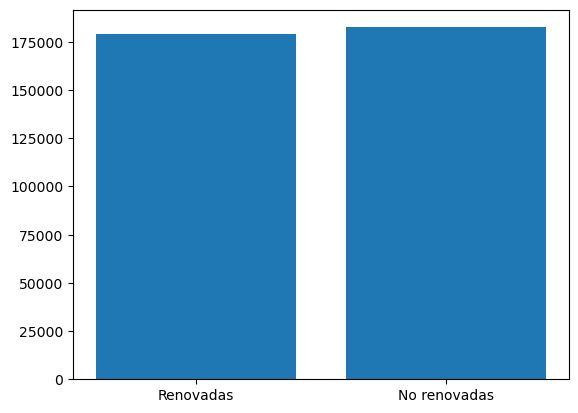

In [ ]:
df['RecentlyRemodelled'] = df['YearRemodAdd'] != df['YearBuilt']

recently_remodelled = df[df['RecentlyRemodelled']]
not_remodelled = df[~df['RecentlyRemodelled']]

avg_price_remodelled = recently_remodelled['SalePrice'].mean()
avg_price_not_remodelled = not_remodelled['SalePrice'].mean()

print(f"Precio promedio de casas renovadas recientemente: ${avg_price_remodelled:,.2f}")
print(f"Precio promedio de casas no renovadas: ${avg_price_not_remodelled:,.2f}")

if avg_price_remodelled > avg_price_not_remodelled:
    print("Las casas renovadas recientemente tienen un precio mayor que las no renovadas.")
else:
    print("Las casas renovadas recientemente no tienen un precio mayor que las no renovadas.")

plt.bar(["Renovadas", "No renovadas"], [avg_price_remodelled, avg_price_not_remodelled])

# ¿Cómo influye la condición general de la casa en su precio de venta?

   OverallCond      SalePrice
0            1   61000.000000
1            2  141986.400000
2            3  101929.400000
3            4  120438.438596
4            5  203146.914738
5            6  153961.591270
6            7  158145.487805
7            8  155651.736111
8            9  216004.545455


/tmp/ipykernel_17404/2584178343.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverallCond', y='SalePrice', data=price_by_condition, palette='viridis')


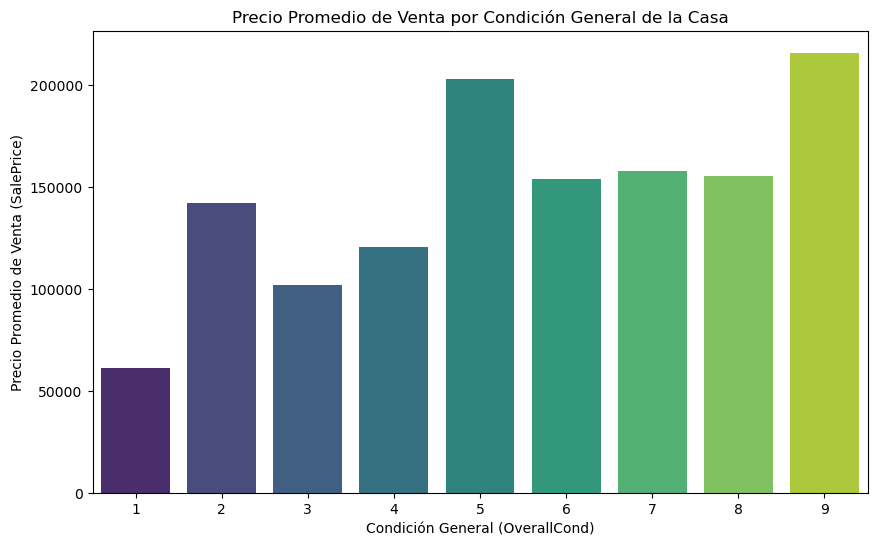

In [30]:
price_by_condition = df.groupby('OverallCond')['SalePrice'].mean().reset_index()

print(price_by_condition)

plt.figure(figsize=(10, 6))
sns.barplot(x='OverallCond', y='SalePrice', data=price_by_condition, palette='viridis')
plt.title('Precio Promedio de Venta por Condición General de la Casa')
plt.xlabel('Condición General (OverallCond)')
plt.ylabel('Precio Promedio de Venta (SalePrice)')
plt.show()

# ¿Cómo se relaciona el tamaño del terreno con el precio de venta?

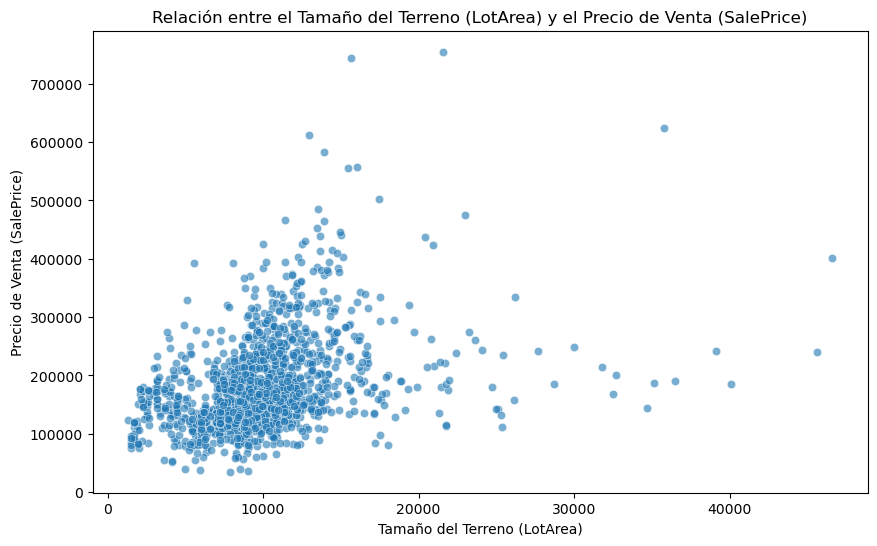

Coeficiente de correlación entre LotArea y SalePrice: 0.26


In [31]:
df_filtered = df[df['LotArea'] < 50000]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_filtered, alpha=0.6)
plt.title('Relación entre el Tamaño del Terreno (LotArea) y el Precio de Venta (SalePrice)')
plt.xlabel('Tamaño del Terreno (LotArea)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()

correlation = df['LotArea'].corr(df['SalePrice'])
print(f"Coeficiente de correlación entre LotArea y SalePrice: {correlation:.2f}")

# ¿Cómo influyen el número de habitaciones y baños en el precio de la casa?

/tmp/ipykernel_17404/1399122816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='viridis')


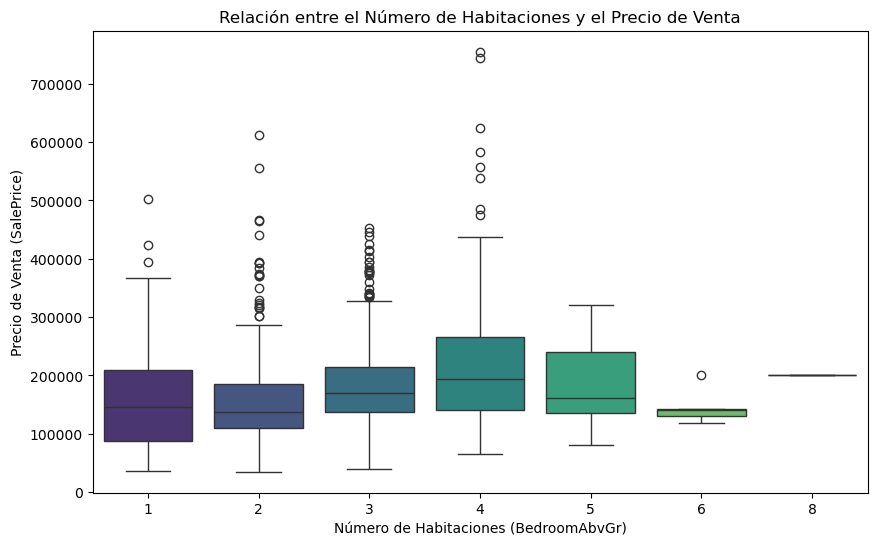

/tmp/ipykernel_17404/1399122816.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalBath', y='SalePrice', data=df, palette='viridis')


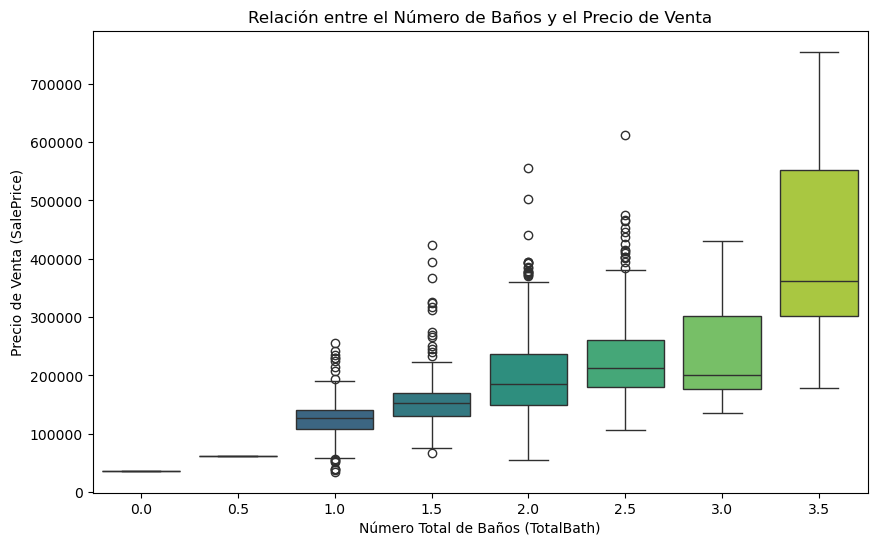

Coeficiente de correlación entre el número de habitaciones y el precio de venta: 0.18
Coeficiente de correlación entre el número total de baños y el precio de venta: 0.61


In [32]:
df = df[df['BedroomAbvGr'] != 0]
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']

plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df, palette='viridis')
plt.title('Relación entre el Número de Habitaciones y el Precio de Venta')
plt.xlabel('Número de Habitaciones (BedroomAbvGr)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalBath', y='SalePrice', data=df, palette='viridis')
plt.title('Relación entre el Número de Baños y el Precio de Venta')
plt.xlabel('Número Total de Baños (TotalBath)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.show()

correlation_bedrooms = df['BedroomAbvGr'].corr(df['SalePrice'])
correlation_bath = df['TotalBath'].corr(df['SalePrice'])

print(f"Coeficiente de correlación entre el número de habitaciones y el precio de venta: {correlation_bedrooms:.2f}")
print(f"Coeficiente de correlación entre el número total de baños y el precio de venta: {correlation_bath:.2f}")

# ¿Las casas con sótanos terminados tienen un precio de venta más alto?

/tmp/ipykernel_17404/2204372457.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Con sótano terminado', 'Sin sótano terminado'], y=[avg_price_finished, avg_price_unfinished], palette='viridis')


Precio promedio de casas con sótanos terminados: $184,987.93
Precio promedio de casas sin sótanos terminados: $170,670.58
Las casas con sótanos terminados tienen un precio mayor que las sin sótanos terminados.


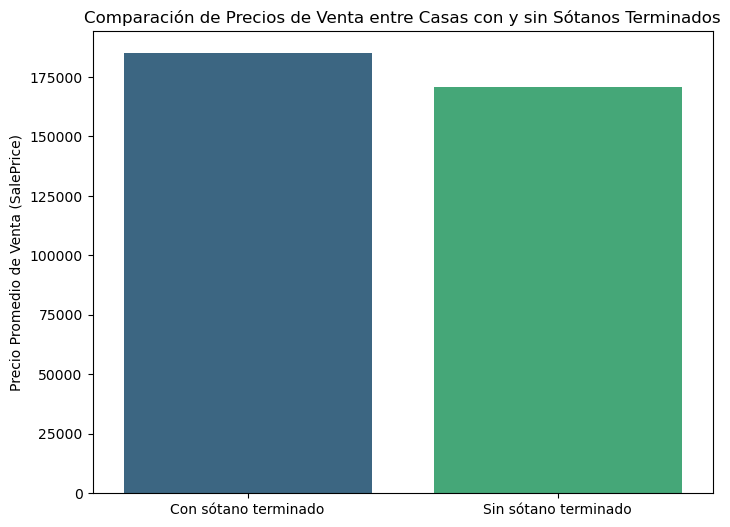

In [33]:
df['FinishedBasement'] = df['BsmtFinType1'] != 'Unf'

finished_basement = df[df['FinishedBasement']]
unfinished_basement = df[~df['FinishedBasement']]

avg_price_finished = finished_basement['SalePrice'].mean()
avg_price_unfinished = unfinished_basement['SalePrice'].mean()

print(f"Precio promedio de casas con sótanos terminados: ${avg_price_finished:,.2f}")
print(f"Precio promedio de casas sin sótanos terminados: ${avg_price_unfinished:,.2f}")

if avg_price_finished > avg_price_unfinished:
    print("Las casas con sótanos terminados tienen un precio mayor que las sin sótanos terminados.")
else:
    print("Las casas con sótanos terminados no tienen un precio mayor que las sin sótanos terminados.")

plt.figure(figsize=(8, 6))
sns.barplot(x=['Con sótano terminado', 'Sin sótano terminado'], y=[avg_price_finished, avg_price_unfinished], palette='viridis')
plt.title('Comparación de Precios de Venta entre Casas con y sin Sótanos Terminados')
plt.ylabel('Precio Promedio de Venta (SalePrice)')
plt.show()

# ¿Cómo influye la presencia de una piscina en el precio de la vivienda?

Precio promedio de casas con piscina: $288,138.57
Precio promedio de casas sin piscina: $180,234.29
Las casas con piscina tienen un precio mayor que las sin piscina.


/tmp/ipykernel_17404/2650953637.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Con piscina', 'Sin piscina'], y=[avg_price_with_pool, avg_price_without_pool], palette='viridis')


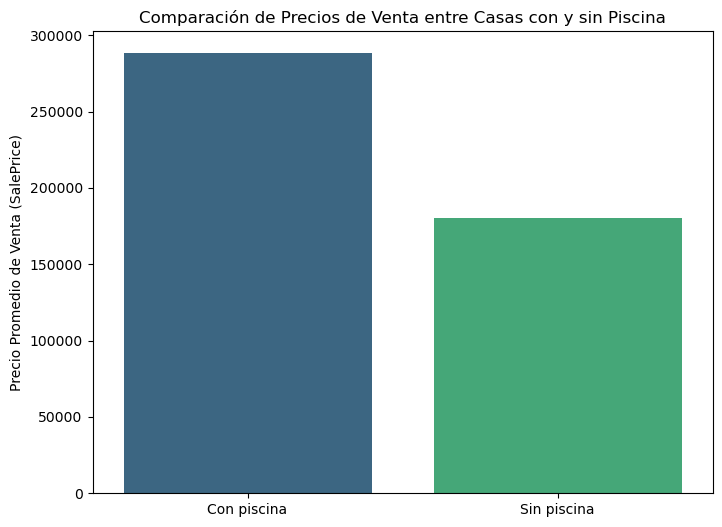

In [34]:
df['HasPool'] = df['PoolArea'] > 0

with_pool = df[df['HasPool']]
without_pool = df[~df['HasPool']]

avg_price_with_pool = with_pool['SalePrice'].mean()
avg_price_without_pool = without_pool['SalePrice'].mean()

print(f"Precio promedio de casas con piscina: ${avg_price_with_pool:,.2f}")
print(f"Precio promedio de casas sin piscina: ${avg_price_without_pool:,.2f}")

if avg_price_with_pool > avg_price_without_pool:
    print("Las casas con piscina tienen un precio mayor que las sin piscina.")
else:
    print("Las casas con piscina no tienen un precio mayor que las sin piscina.")

plt.figure(figsize=(8, 6))
sns.barplot(x=['Con piscina', 'Sin piscina'], y=[avg_price_with_pool, avg_price_without_pool], palette='viridis')
plt.title('Comparación de Precios de Venta entre Casas con y sin Piscina')
plt.ylabel('Precio Promedio de Venta (SalePrice)')
plt.show()

# ¿Existe una diferencia de precio significativa entre las casas con diferentes tipos de calefacción?

  Heating      SalePrice
0   Floor   72500.000000
1    GasA  181854.646976
2    GasW  166632.166667
3    Grav   75271.428571
4    OthW  125750.000000
5    Wall   92100.000000


/tmp/ipykernel_17404/2453009574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heating', y='SalePrice', data=price_by_heating, palette='viridis')


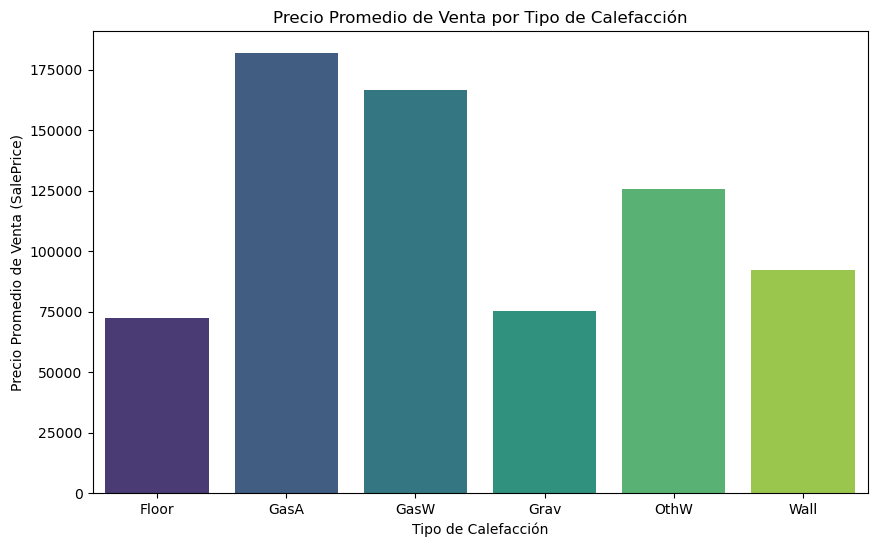

Estadístico F: 4.26
Valor p: 0.0008
Existe una diferencia significativa en los precios entre los diferentes tipos de calefacción.


In [ ]:
price_by_heating = df.groupby('Heating')['SalePrice'].mean().reset_index()

print(price_by_heating)

plt.figure(figsize=(10, 6))
sns.barplot(x='Heating', y='SalePrice', data=price_by_heating, palette='viridis')
plt.title('Precio Promedio de Venta por Tipo de Calefacción')
plt.xlabel('Tipo de Calefacción')
plt.ylabel('Precio Promedio de Venta (SalePrice)')
plt.show()

groups = [df[df['Heating'] == heating]['SalePrice'] for heating in df['Heating'].unique()]
f_statistic, p_value = f_oneway(*groups)

print(f"Estadístico F: {f_statistic:.2f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Existe una diferencia significativa en los precios entre los diferentes tipos de calefacción.")
else:
    print("No existe una diferencia significativa en los precios entre los diferentes tipos de calefacción.")